# Alzheimer Disease Prediction - Exploratory Data Analysis

This notebook explores the Alzheimer disease dataset to understand which factors are associated with Alzheimer diagnoses. The goal is to build a predictive model that can identify patients at risk of Alzheimer's disease based on various clinical, demographic, and lifestyle factors.

### Dataset Overview:

The dataset contains patient information including:
- **Demographics**: Age, Gender, Ethnicity, Education Level
- **Lifestyle factors**: BMI, Smoking, Alcohol Consumption, Physical Activity, Diet Quality, Sleep Quality
- **Medical history**: Family History, Cardiovascular Disease, Diabetes, Depression, Head Injury, Hypertension
- **Clinical measurements**: Blood Pressure (Systolic/Diastolic), Cholesterol levels (Total, LDL, HDL, Triglycerides)
- **Cognitive assessments**: MMSE (Mini-Mental State Examination), Functional Assessment, ADL (Activities of Daily Living)
- **Symptoms**: Memory Complaints, Behavioral Problems, Confusion, Disorientation, Personality Changes, Difficulty Completing Tasks, Forgetfulness
- **Target variable**: Diagnosis (0 = No Alzheimer, 1 = Alzheimer)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set display options
pd.set_option('display.max_columns', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## 1. Data Understanding and Preparation

### 1.1 Read the Data

Let's open the csv and assign to a dataframe variable.


In [ ]:
# Define the parameters to read the data
root_path = ""
dataset = "alzheimers_disease_data.csv"
sep = ","
encoding = "utf-8"

# Read the data
original_data = pd.read_csv(
    filepath_or_buffer=os.path.abspath(os.path.join(root_path, dataset)), 
    sep=sep, 
    encoding=encoding
)

data = original_data.copy()
data.head()


### 1.2 Dataset Exploratory Data Analysis (EDA)

#### Dataset Information

Let's identify the type of the variables (integer, float, object...) and the size of the dataset. Which are the variables with more nulls? And with no nulls?

**Questions:**
- How many records does the data have?
- How many nulls does each attribute have?
- Has each attribute the right datatype?


In [ ]:
# Analyze dataset info, size, and data types
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()
print("\nNull values per column:")
print(data.isnull().sum())
print("\nData types:")
print(data.dtypes)


#### Descriptive Statistics

Explore the dataset using descriptive statistics to understand the distribution of numerical and categorical variables.


In [ ]:
# Descriptive statistics for numerical variables
print("Descriptive Statistics for Numerical Variables:")
print(data.describe())

# Check unique values in categorical variables
print("\nUnique values in categorical variables:")
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 
                    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
                    'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 
                    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

for col in categorical_cols:
    if col in data.columns:
        print(f"{col}: {data[col].unique()}")

# Value counts for key categorical variables
print("\nValue counts for key categorical variables:")
print("\nDiagnosis distribution:")
print(data['Diagnosis'].value_counts())
print("\nGender distribution:")
print(data['Gender'].value_counts())
print("\nEthnicity distribution:")
print(data['Ethnicity'].value_counts())
print("\nEducationLevel distribution:")
print(data['EducationLevel'].value_counts())


#### Target Variable Distribution


In [ ]:
# Define target variable
target_variable = ["Diagnosis"]

# Target distribution
class_counts = data['Diagnosis'].value_counts().rename({0: "No Alzheimer", 1: "Alzheimer"})
class_props = (class_counts / len(data) * 100).round(2)

print("Target Variable Distribution:")
print(class_counts)
print("\nPercentages:")
print(class_props)

# Visualize target distribution
ax = sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)
ax.set_title("Diagnosis Distribution")
ax.set_ylabel("Number of Patients")
for p, c in zip(ax.patches, class_counts.values):
    ax.annotate(f"{c}\n({c/len(data)*100:.1f}%)", (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom")
plt.tight_layout()
plt.show()


#### Relationship between Diagnosis and Numerical Variables

Draw box plots and distribution plots for numerical variables grouped by diagnosis.


In [ ]:
# Define numerical variables (exclude PatientID, DoctorInCharge, and target)
num_variables = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
                 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
                 'MMSE', 'FunctionalAssessment', 'ADL', 'AlcoholConsumption',
                 'PhysicalActivity', 'DietQuality', 'SleepQuality']

# Filter to only include columns that exist in the dataset
num_variables = [col for col in num_variables if col in data.columns]

print(f"Numerical variables to analyze: {len(num_variables)}")
print(num_variables)


In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Determine the number of rows and columns for the subplot grid
num_vars = len(num_variables)
cols = 2  # Two plots for each variable: boxplot and distribution plot
rows = num_vars  # One row for each variable

# Create a figure
fig, axs = plt.subplots(rows, cols, figsize=(15, 4*rows))

# Box plots and distribution plots for numerical variables
for i, column in enumerate(num_variables):
    # Box plot: variable grouped by diagnosis
    sns.boxplot(x='Diagnosis', y=column, data=data, ax=axs[i, 0])
    axs[i, 0].set_title(f'Box plot of {column} by Diagnosis')

    # Distribution plot: variable against diagnosis value (grouped by diagnosis)
    sns.histplot(data=data, x=column, hue='Diagnosis', kde=True, element='step', ax=axs[i, 1])
    axs[i, 1].set_title(f'Distribution of {column} by Diagnosis')

# Adjust layout
plt.tight_layout()
plt.show()


#### Relationship between Diagnosis and Categorical Variables

Draw count plots for categorical variables grouped by diagnosis.


In [ ]:
# Define categorical variables (binary and multi-category)
# Binary variables
binary_variables = ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 
                    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
                    'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges',
                    'DifficultyCompletingTasks', 'Forgetfulness']

# Multi-category variables
multi_cat_variables = ['Ethnicity', 'EducationLevel']

categorical_variables = binary_variables + multi_cat_variables

# Filter to only include columns that exist in the dataset
categorical_variables = [col for col in categorical_variables if col in data.columns]

print(f"Categorical variables to analyze: {len(categorical_variables)}")
print(categorical_variables)


In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Determine the number of rows and columns for the subplot grid
cat_vars = len(categorical_variables)
cols = 2  # Two plots for each variable: count plot and distribution plot
rows = cat_vars  # One row for each variable

# Create a figure
fig, axs = plt.subplots(rows, cols, figsize=(15, 4*rows))

# Count plots and distribution plots for categorical variables
for i, column in enumerate(categorical_variables):
    # Count plot: variable alone (without diagnosis grouping)
    sns.countplot(x=column, data=data, ax=axs[i, 0])
    axs[i, 0].set_title(f'Count plot of {column}')
    axs[i, 0].tick_params(axis='x', rotation=45)
    
    # Distribution plot: variable against diagnosis value (grouped by diagnosis)
    sns.countplot(x=column, hue='Diagnosis', data=data, ax=axs[i, 1])
    axs[i, 1].set_title(f'Distribution of {column} by Diagnosis')
    axs[i, 1].tick_params(axis='x', rotation=45)
    axs[i, 1].legend(title='Diagnosis', labels=['No Alzheimer', 'Alzheimer'])

# Adjust layout
plt.tight_layout()
plt.show()


#### Pairplot for Key Numerical Variables


In [ ]:
# Select key numerical variables for pairplot (to avoid too many plots)
key_num_variables = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'MMSE', 'CholesterolTotal', 'Diagnosis']
key_num_variables = [col for col in key_num_variables if col in data.columns]

sns.pairplot(data[key_num_variables], hue="Diagnosis", height=3, diag_kind="kde")
plt.suptitle("Pairplot of Key Numerical Variables by Diagnosis", y=1.02)
plt.tight_layout()
plt.show()


#### Correlation Matrix


In [ ]:
# Select variables for correlation matrix (numerical variables + target)
corr_variables = num_variables + target_variable
corr_variables = [col for col in corr_variables if col in data.columns]

corr_matrix = data[corr_variables].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Show correlations with target variable
target_corr = corr_matrix['Diagnosis'].drop('Diagnosis').sort_values(key=abs, ascending=False)
print("\nCorrelation with Diagnosis (sorted by absolute value):")
print(target_corr)


#### Key Insights Summary

**Insights from the analysis:**

1. **Target Variable Balance**: The dataset shows approximately 64.6% No Alzheimer vs 35.4% Alzheimer cases. This indicates a moderate class imbalance that should be considered during modeling.

2. **Strongest Predictors**: Based on correlation analysis, identify the variables most strongly associated with Alzheimer diagnosis from the correlation output above.

3. **Key Patterns Observed**: 
   - Review the box plots and distribution plots to identify patterns
   - Review categorical variable distributions to identify risk factors

4. **Data Quality**: Check the null values and data types from the earlier analysis.

**Next Steps for Data Wrangling:**
- Handle any missing values (if present)
- Encode categorical variables (one-hot encoding for multi-category, binary encoding for binary)
- Scale numerical variables
- Remove irrelevant columns (PatientID, DoctorInCharge)
- Address any outliers if necessary


In [ ]:
overview = pd.DataFrame({
    "dtype": df.dtypes,
    "n_unique": df.nunique(),
    "missing": df.isna().sum(),
    "%_missing": (df.isna().mean() * 100).round(2)
}).sort_values(by="%_missing", ascending=False)
overview


,dtype,n_unique,missing,%_missing
PatientID,int64,2149,0,0.0
BehavioralProblems,int64,2,0,0.0
CholesterolLDL,float64,2149,0,0.0
CholesterolHDL,float64,2149,0,0.0
CholesterolTriglycerides,float64,2149,0,0.0
MMSE,float64,2149,0,0.0
FunctionalAssessment,float64,2149,0,0.0
MemoryComplaints,int64,2,0,0.0
ADL,float64,2149,0,0.0
DiastolicBP,int64,60,0,0.0


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


Diagnosis
No Alzheimer    1389
Alzheimer        760
Name: count, dtype: int64
Diagnosis
No Alzheimer    64.63
Alzheimer       35.37
Name: count, dtype: float64


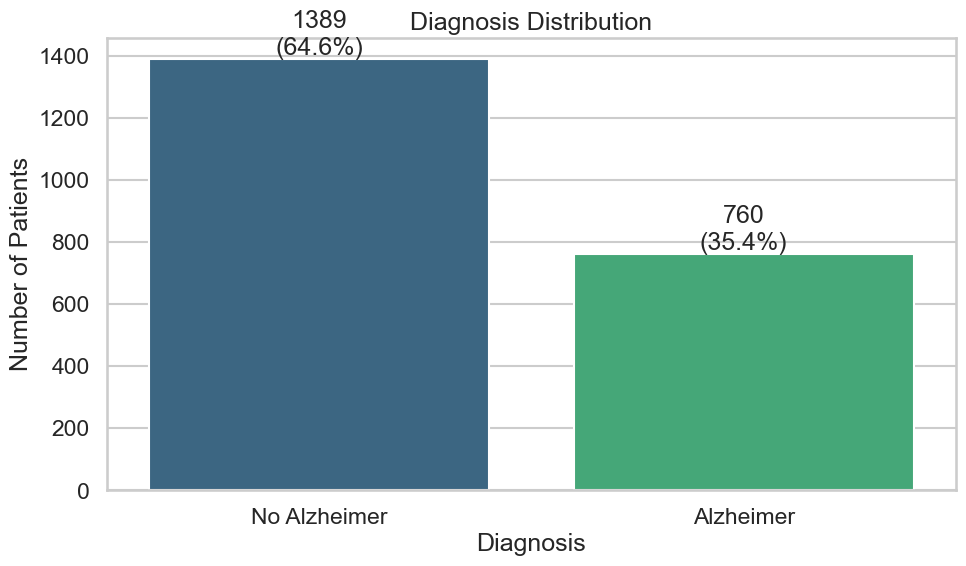

In [ ]:
TARGET_COL = "Diagnosis"
if TARGET_COL not in df.columns:
    raise ValueError(f"Target column '{TARGET_COL}' not found.")

class_counts = df[TARGET_COL].value_counts().rename({0: "No Alzheimer", 1: "Alzheimer"})
class_props = (class_counts / len(df) * 100).round(2)

print(class_counts)
print(class_props)

ax = sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)
ax.set_title("Diagnosis Distribution")
ax.set_ylabel("Number of Patients")
for p, c in zip(ax.patches, class_counts.values):
    ax.annotate(f"{c}\n({c/len(df)*100:.1f}%)", (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom")
plt.tight_layout()
plt.show()


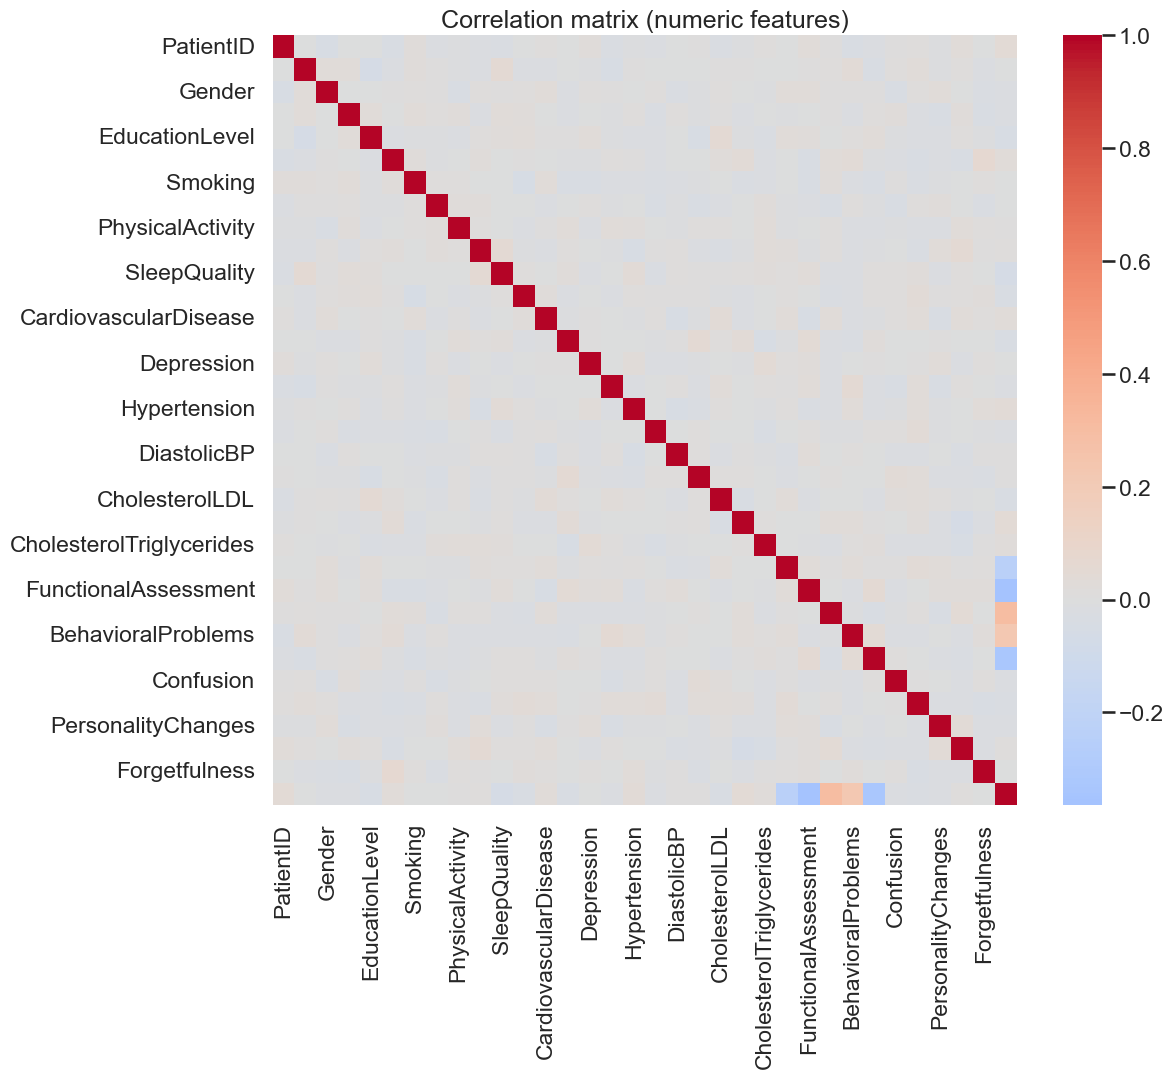

FunctionalAssessment      -0.364898
ADL                       -0.332346
MemoryComplaints           0.306742
MMSE                      -0.237126
BehavioralProblems         0.224350
SleepQuality              -0.056548
EducationLevel            -0.043966
CholesterolHDL             0.042584
PatientID                  0.041019
Hypertension               0.035080
FamilyHistoryAlzheimers   -0.032900
CholesterolLDL            -0.031976
Diabetes                  -0.031508
CardiovascularDisease      0.031490
BMI                        0.026343
Name: Diagnosis, dtype: float64

In [ ]:
corr = df[numeric_cols].corr()
target_corr = corr[TARGET_COL].drop(TARGET_COL).sort_values(key=np.abs, ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation matrix (numeric features)")
plt.show()

target_corr.head(15)


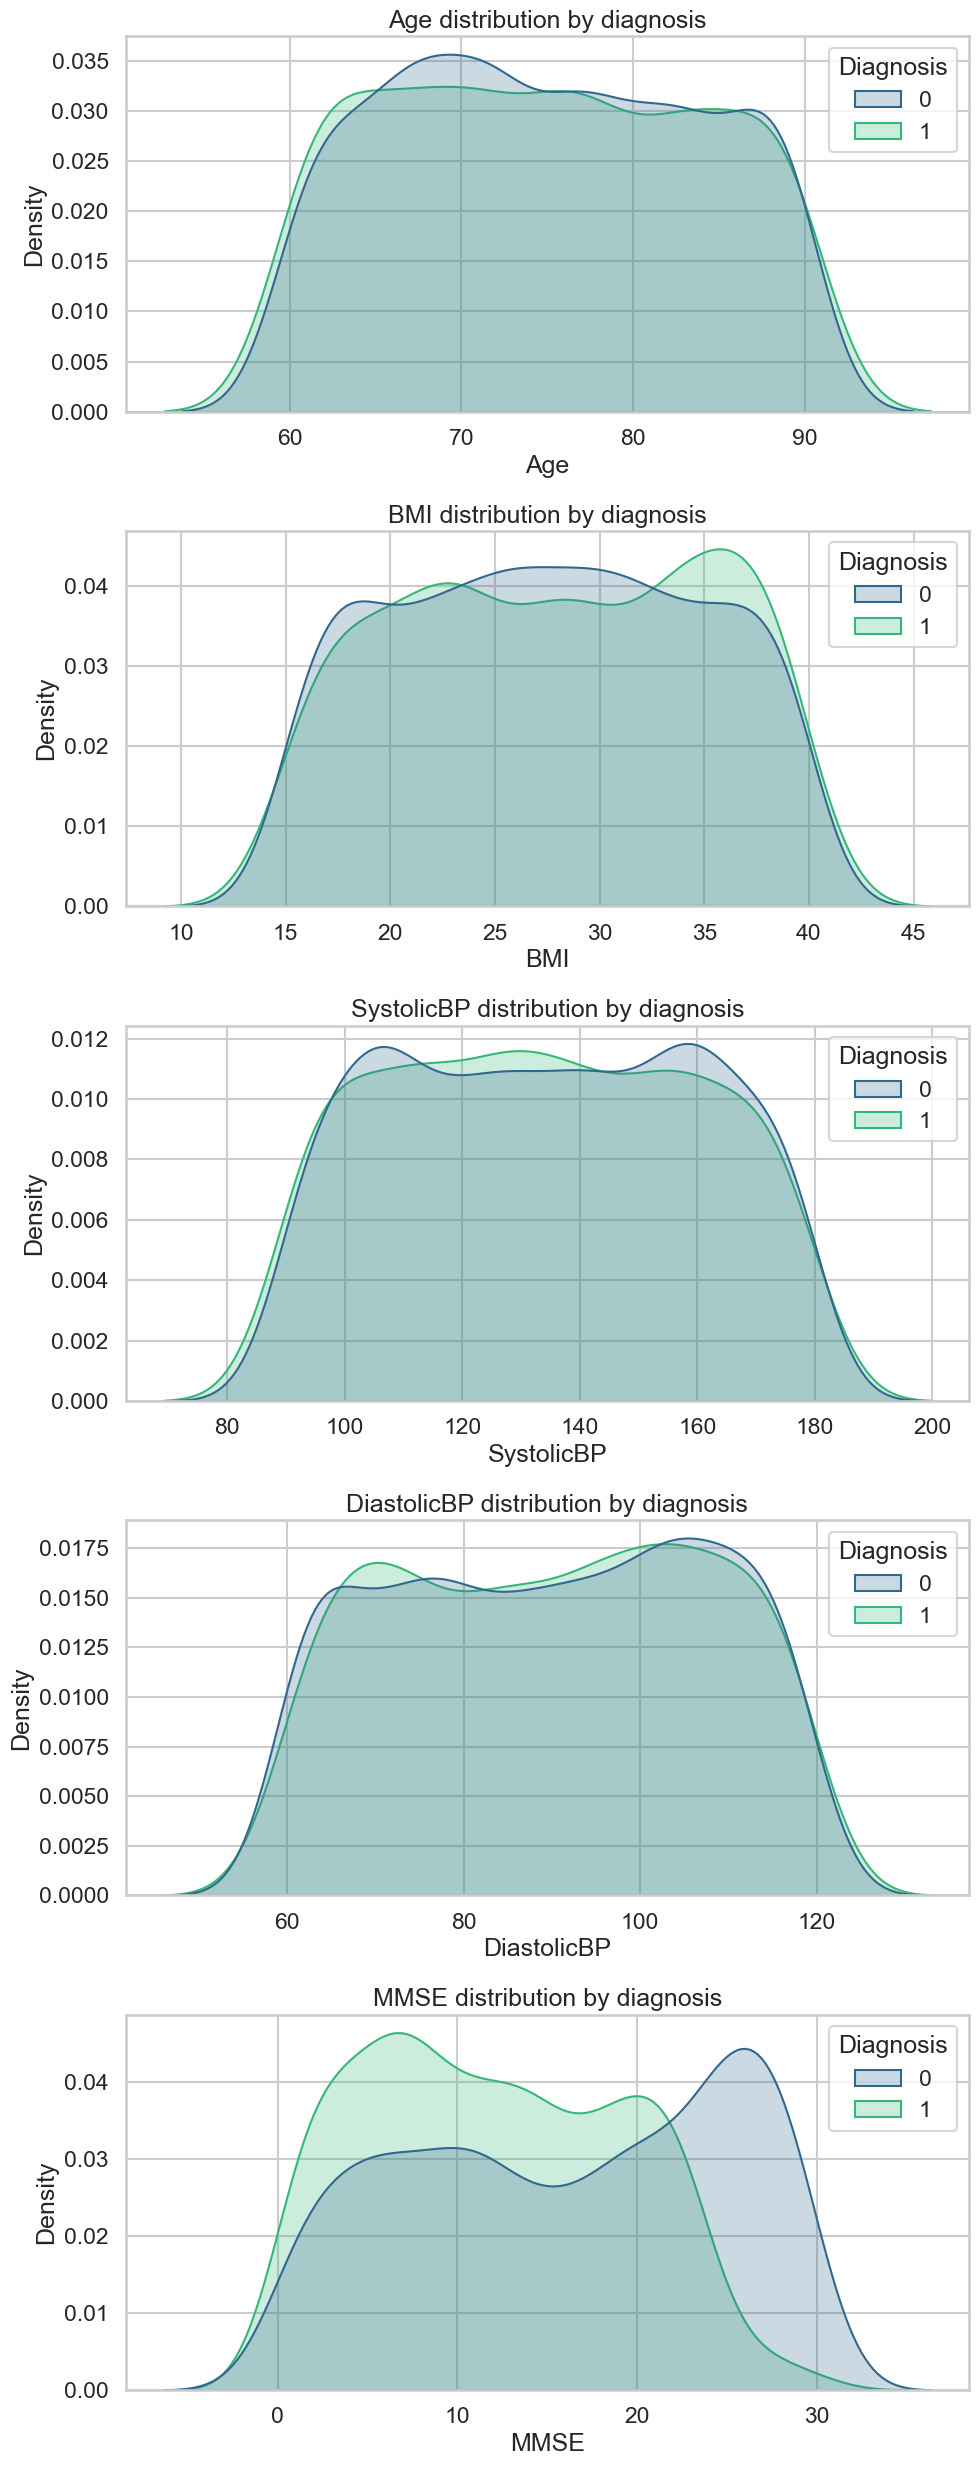

In [ ]:
continuous_focus = ["Age", "BMI", "SystolicBP", "DiastolicBP", "MMSE"]
fig, axes = plt.subplots(len(continuous_focus), 1, figsize=(10, 5 * len(continuous_focus)))
if len(continuous_focus) == 1:
    axes = [axes]
for ax, col in zip(axes, continuous_focus):
    sns.kdeplot(data=df, x=col, hue=TARGET_COL, fill=True, common_norm=False, ax=ax, palette="viridis")
    ax.set_title(f"{col} distribution by diagnosis")
plt.tight_layout()
plt.show()


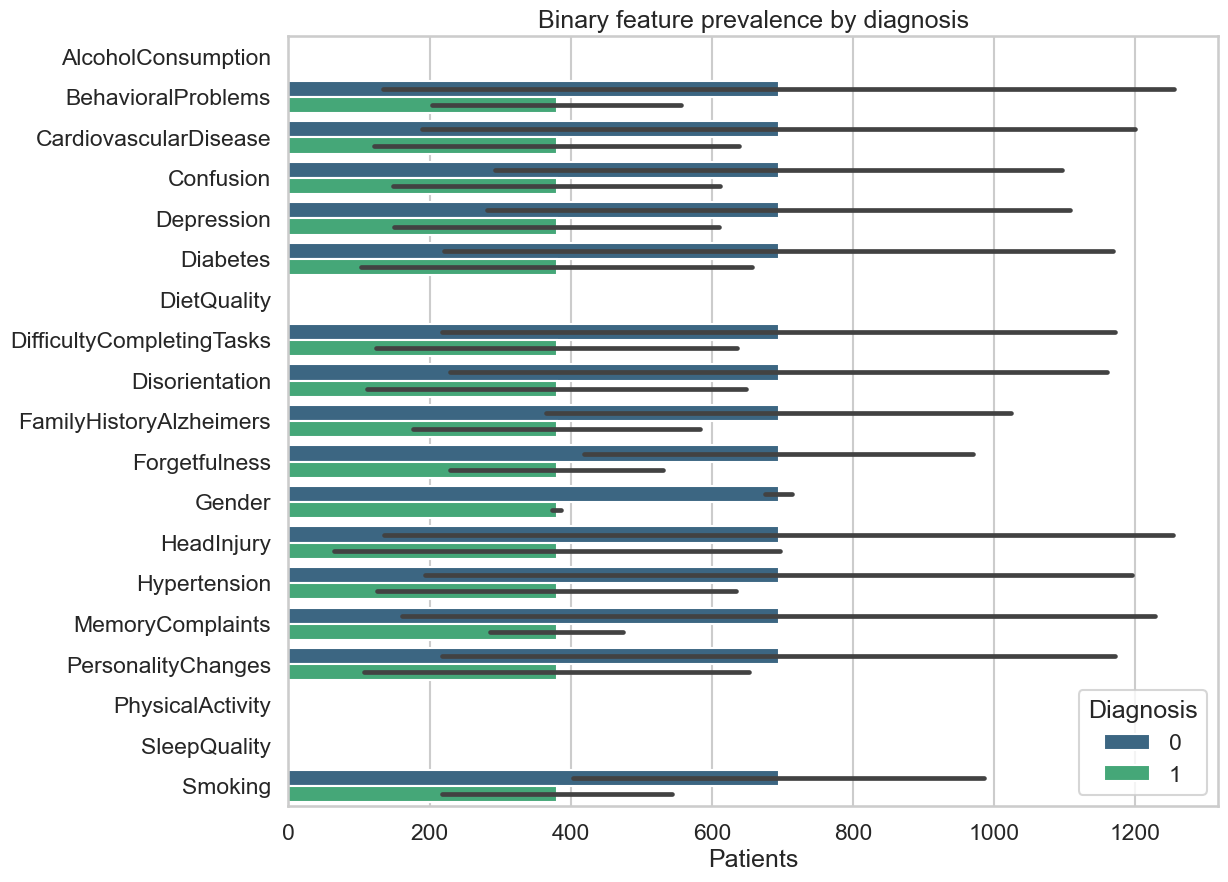

,feature,value,Diagnosis,count
0,AlcoholConsumption,0.002003,0,1
1,AlcoholConsumption,0.010504,0,1
2,AlcoholConsumption,0.018738,0,1
3,AlcoholConsumption,0.036260,0,1
4,AlcoholConsumption,0.042765,0,1
5,AlcoholConsumption,0.065286,1,1
6,AlcoholConsumption,0.079314,0,1
7,AlcoholConsumption,0.103460,1,1
8,AlcoholConsumption,0.118817,0,1
9,AlcoholConsumption,0.127110,1,1


In [ ]:
binary_cols = [
    "Gender", "Smoking", "AlcoholConsumption", "PhysicalActivity", "DietQuality",
    "SleepQuality", "FamilyHistoryAlzheimers", "CardiovascularDisease", "Diabetes",
    "Depression", "HeadInjury", "Hypertension", "MemoryComplaints", "BehavioralProblems",
    "Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks",
    "Forgetfulness"
]
cat_summary = (
    df[binary_cols + [TARGET_COL]]
    .melt(id_vars=TARGET_COL, var_name="feature", value_name="value")
    .groupby(["feature", "value", TARGET_COL])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(12, 10))
sns.barplot(
    data=cat_summary,
    x="count",
    y="feature",
    hue=TARGET_COL,
    palette="viridis"
)
plt.title("Binary feature prevalence by diagnosis")
plt.xlabel("Patients")
plt.ylabel("")
plt.legend(title="Diagnosis")
plt.show()

cat_summary.head(20)


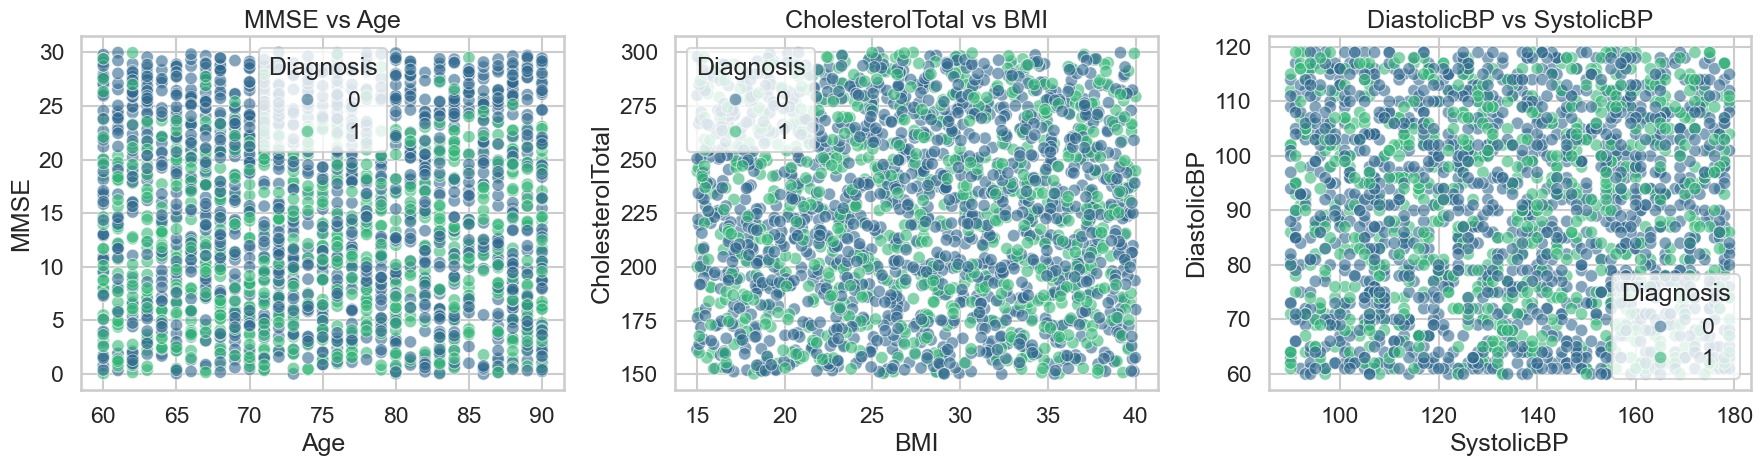

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
scatter_sets = [
    ("Age", "MMSE"),
    ("BMI", "CholesterolTotal"),
    ("SystolicBP", "DiastolicBP")
]
for ax, (x_col, y_col) in zip(axes, scatter_sets):
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=TARGET_COL, palette="viridis", alpha=0.6, ax=ax)
    ax.set_title(f"{y_col} vs {x_col}")
plt.tight_layout()
plt.show()
